<a href="https://colab.research.google.com/github/tuonglab/scRNA_WCAI/blob/master/notebook/scRNA_WCAI_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scRNA-seq analysis demo!

Before we dive into the demo, let's first install the necessary packages.

In [1]:
# # setup the notebook
# !pip install -qqq scanpy[leiden]
# !pip install -qqq celltypist
# # the session might crash after running this step as we are installing numpy. Don't worry. just reconnect and then continue with the rest below.
# !celltypist --update-models
# # second thing to do is to clone the repository so that we have all the data and notebooks ready to go
# !git clone https://github.com/tuonglab/scRNAseq-tutorial.git

zsh:1: no matches found: scanpy[leiden]
^C
ERROR: Operation cancelled by user
zsh:1: command not found: celltypist
Cloning into 'scRNAseq-tutorial'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (59/59), done.


In [ ]:
# change directory
import os

os.chdir("scRNA_WCAI")
[file for file in os.listdir() if not file.startswith(".")]

In [ ]:
# just to make the the code run a bit quieter, i'm suppressing a few warnings here

import warnings

from numba.core.errors import NumbaDeprecationWarning, NumbaWarning

for warn in [
    NumbaDeprecationWarning,
    NumbaWarning,
    FutureWarning,
    UserWarning,
]:  # otherwise very noisy
    warnings.filterwarnings("ignore", category=warn)

# Single-cell RNA seq analysis Demo

This demo will show you the common steps involved to get you started on single cell analysis in Python using `Scanpy`, the toolkit for analysing single-cell gene expression data.


## Preprocessing and Quality Control

First, import packages needed for single-cell RNA seq analysis.

In [1]:
import os

import scanpy as sc
import pandas as pd

Show current directory:

In [2]:
os.getcwd()

'/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/scRNA_WCAI/notebook'

Print software versions:

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.13


### Reading in files for analysis

For this demo, we have already saved the starting raw datafile as an `.h5ad` file which is a common file format used in single-cell analysis. You can read in the file using the `read_h5ad` function from `anndata` package.

This file contains the raw counts of the cells and genes, as well as the metadata associated with the cells and genes.

The file is saved in the `data` folder.


<img src="https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg" alt="anndata_schema" width="800">

In [4]:
adata = sc.read_h5ad("../data/prostate_demo.h5ad")
adata

AnnData object with n_obs × n_vars = 17108 × 33538
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx'
    var: 'gene_ids', 'feature_types'
    layers: 'counts'

In [5]:
adata.obs

,age,barcode,batch,group,highest_GLEASON_score,mri_grading,name,patient,pool,psa,Biopsy Location DETAIL,Biopsy Location BRIEF,Biopsy Location Co-ordinate,PMHx
index,,,,,,,,,,,,,,
SLX-15732SIGAC4HTVNWBBXXs_6_AAACCTGCAGACAAAT,72,SIGAC4,0,tumor,3+4,3,D6_T,D6,SLX-15732,7.3,LEFT anterior lateral,LEFT LATERAL,6L,"HTN, IHD, CKD"
SLX-15732SIGAC4HTVNWBBXXs_6_AAACCTGGTACCGCTG,72,SIGAC4,0,tumor,3+4,3,D6_T,D6,SLX-15732,7.3,LEFT anterior lateral,LEFT LATERAL,6L,"HTN, IHD, CKD"
SLX-15732SIGAC4HTVNWBBXXs_6_AAACCTGTCGGAATCT,72,SIGAC4,0,tumor,3+4,3,D6_T,D6,SLX-15732,7.3,LEFT anterior lateral,LEFT LATERAL,6L,"HTN, IHD, CKD"
SLX-15732SIGAC4HTVNWBBXXs_6_AAACGGGGTCGTGGCT,72,SIGAC4,0,tumor,3+4,3,D6_T,D6,SLX-15732,7.3,LEFT anterior lateral,LEFT LATERAL,6L,"HTN, IHD, CKD"
SLX-15732SIGAC4HTVNWBBXXs_6_AAACGGGGTCTGATCA,72,SIGAC4,0,tumor,3+4,3,D6_T,D6,SLX-15732,7.3,LEFT anterior lateral,LEFT LATERAL,6L,"HTN, IHD, CKD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLX-16362SIGAB3HWFTVBBXXs_4_TTCGAAGCAAGGCTCC,67,SIGAB3,23,normal,0,0,D15_N,D15,SLX-16362,22.2,?,?,?,?
SLX-16362SIGAB3HWFTVBBXXs_4_TTCTCCTCAACTGCGC,67,SIGAB3,23,normal,0,0,D15_N,D15,SLX-16362,22.2,?,?,?,?
SLX-16362SIGAB3HWFTVBBXXs_4_TTCTCCTTCAATCACG,67,SIGAB3,23,normal,0,0,D15_N,D15,SLX-16362,22.2,?,?,?,?


In [6]:
adata.var

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC233755.2,ENSG00000277856,Gene Expression
AC233755.1,ENSG00000275063,Gene Expression
AC240274.1,ENSG00000271254,Gene Expression
AC213203.1,ENSG00000277475,Gene Expression


In [7]:
adata.layers

Layers with keys: counts

## Standard Quality control

A very common QC step is to assess the mitochondrial content.

High mitochondrial content is often associated with poor quality cells. We can calculate the percentage of mitochondrial genes in each cell and plot it.

In [8]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=[
        "mt",
    ],
    inplace=True,
    log1p=True,
)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


One can now inspect violin plots of some of the computed QC metrics:

> the number of genes expressed in the count matrix

> the total counts per cell

> the percentage of counts in mitochondrial/ribosomal genes

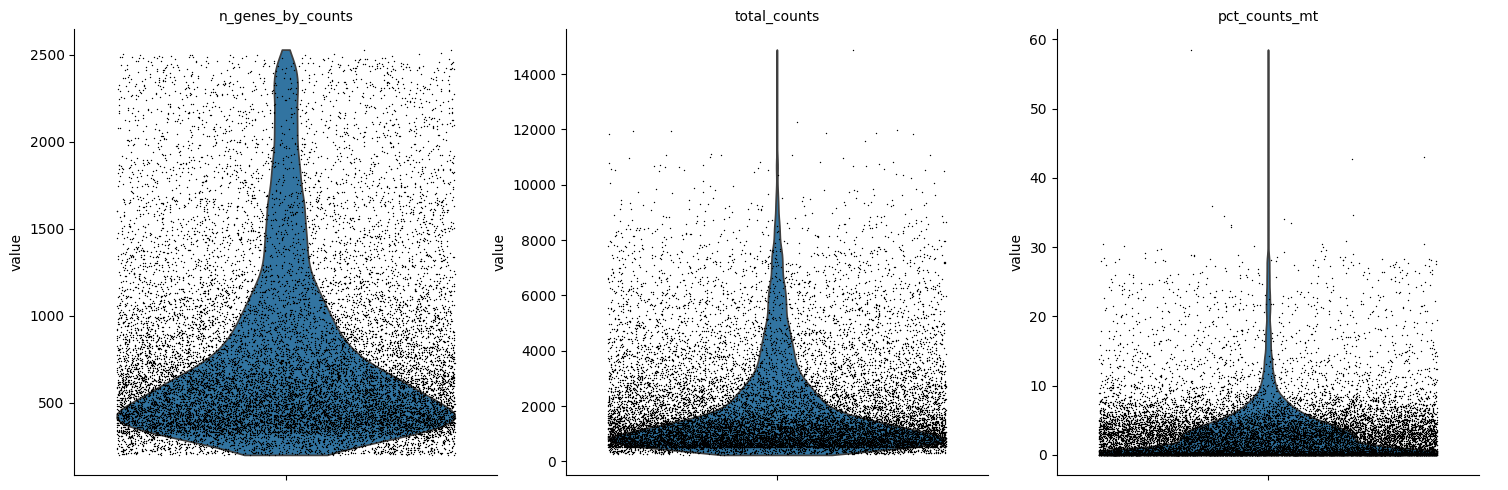

In [9]:
sc.pl.violin(
    adata,
    [
        "n_genes_by_counts",
        "total_counts",
        "pct_counts_mt",
    ],
    jitter=0.4,
    multi_panel=True,
)

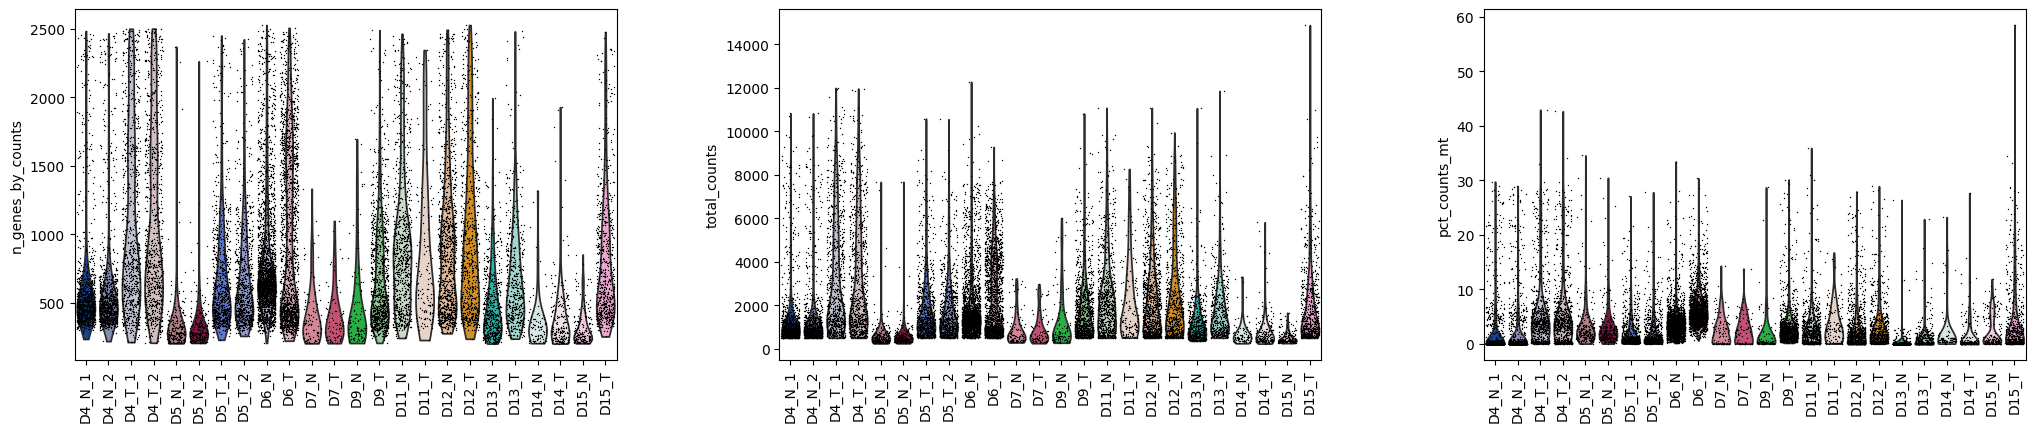

In [11]:
sc.pl.violin(
    adata,
    [
        "n_genes_by_counts",
        "total_counts",
        "pct_counts_mt",
    ],
    jitter=0.4,
    groupby="name",
    multi_panel=True,
    rotation=90,
)

Additionally, it is useful to consider QC metrics jointly by inspecting a scatter plot colored by `pct_counts_mt`.

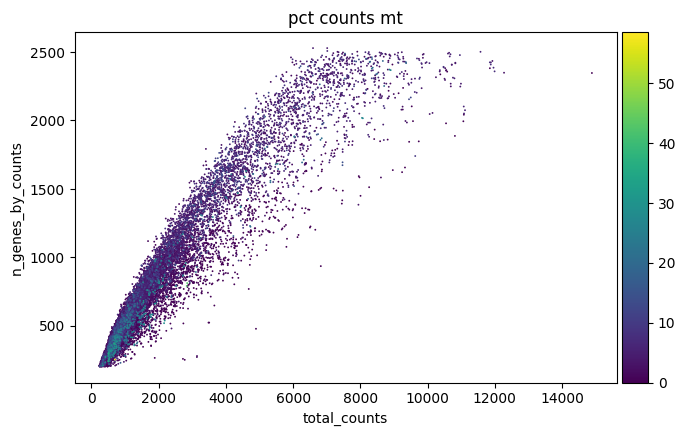

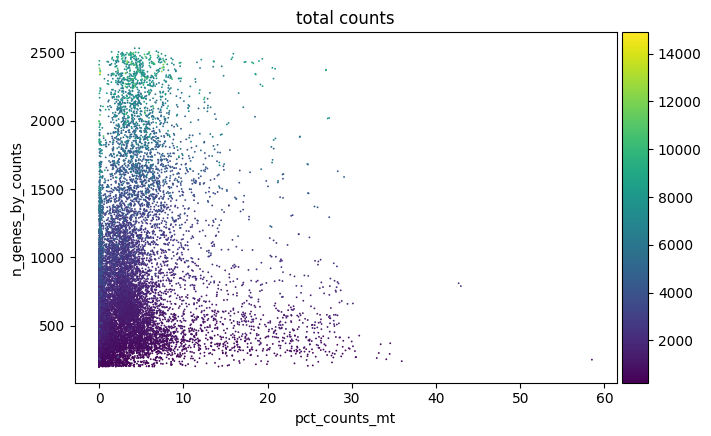

In [12]:
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts", color="pct_counts_mt")
sc.pl.scatter(adata, x="pct_counts_mt", y="n_genes_by_counts", color="total_counts")

Continue processing with "good" cells only..

In [13]:
# filter cells if they do not express at least 200 genes
sc.pp.filter_cells(adata, min_genes=200)
# filter genes if they are expressed in at least 3 cells
sc.pp.filter_genes(adata, min_cells=3)

In [14]:
# always check after you have done some filtering to ensure that you are happy with the results
adata

AnnData object with n_obs × n_vars = 17108 × 20680
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'name_colors'
    layers: 'counts'

❓> Ask yourself, what are usual good cut-offs? Are they always appropriate?

`n_obs` basically means number of observations (cells) and `n_vars` is number of variables (genes).

## Normalisation

Normalize (library-size correct) the data matrix 𝐗 to 10,000 counts per cell, so that information become comparable between cells.

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)

# Logarithmize the data:
sc.pp.log1p(adata)

❓> What are some changes that you can see to confirm that normalisation has taken
place? HINT - "look for log1p" Are there any other ways to confirm?

## Highly Variable Feature/Gene selection

Identify and inspect highly-variable genes

In [16]:
# (Expects logarithimised data)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

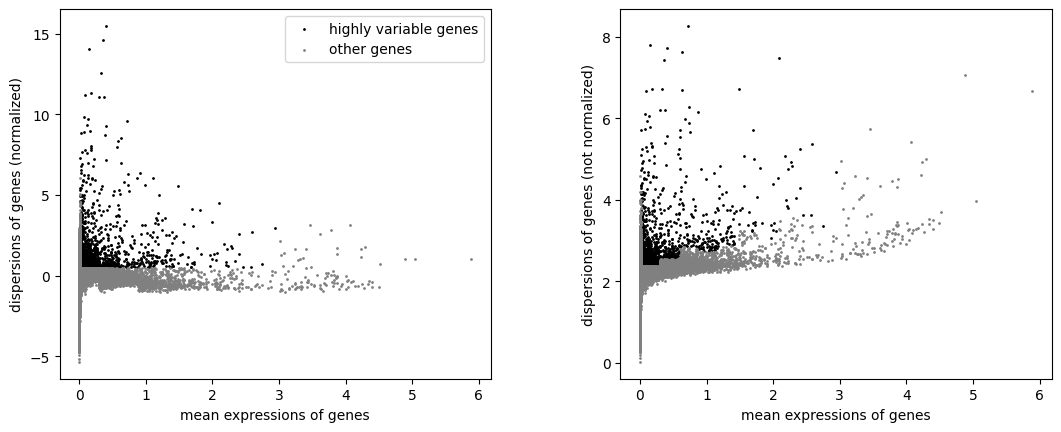

In [17]:
sc.pl.highly_variable_genes(adata)

🔔 Count how many is actually highly variable.

In [18]:
adata.var.highly_variable.value_counts()

highly_variable
False    18154
True      2526
Name: count, dtype: int64

In [19]:
# stash what we have done in raw, before we subset the data
adata.raw = adata

## Dimensionality Reduction

### Step 1: Subset to only highly variable genes

In [20]:
# Actually do the filtering for PCA
adata = adata[
    :, adata.var.highly_variable
].copy()  # all rows/indexes : columns only selecting for those within high_variable, and then making a copy of itself
adata

AnnData object with n_obs × n_vars = 17108 × 2526
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'name_colors', 'log1p', 'hvg'
    layers: 'counts'

### Step 2: Regress out effects of "total_counts" per cell and percentage of mitochondrial genes expressed

In [21]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

### Step 3: Scale each gene to unit variance. Clip values exceeding standard deviation of 10.

In [22]:
sc.pp.scale(adata, max_value=10)

>❓Why do we need to scale the data?

🔔 OPTIONAL - Scaling the data adjusts the expression values of genes across cells to make them more comparable. How do we confirm?

### Step 4: Perform Principal Component Analysis (PCA)

PCA is a linear dimensionality reduction technique that can be used to reduce the dimensionality of the data while retaining most of the variance in the data. It does this by transforming the data into a new set of orthogonal axes called principal components. It is not just used in single-cell analysis but in many other fields as well.

In [23]:
sc.tl.pca(adata, svd_solver="arpack")

Plot to visualise the variance contribution by each PC


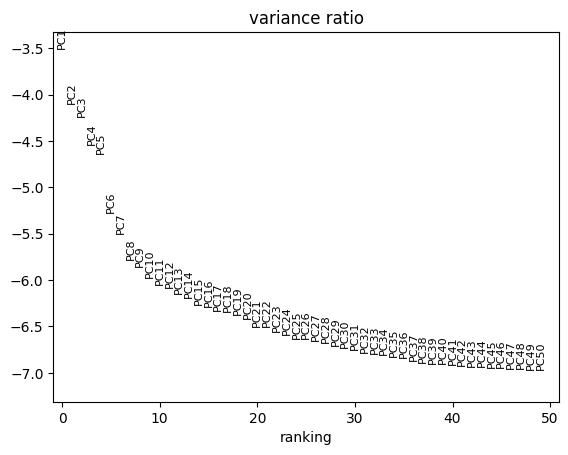

In [24]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

### Step 4: Compute neighbourhood graph

In [25]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

### Step 5: Embed the neighbourhood graph using UMAP

UMAP stands for Uniform Manifold Approximation and Projection. It is a non-linear dimensionality reduction technique that is well-suited for preserving local structure in high-dimensional data. 

In [26]:
sc.tl.umap(adata, min_dist=0.3)  # 0.3 is personal preference

#### Visualise UMAP:

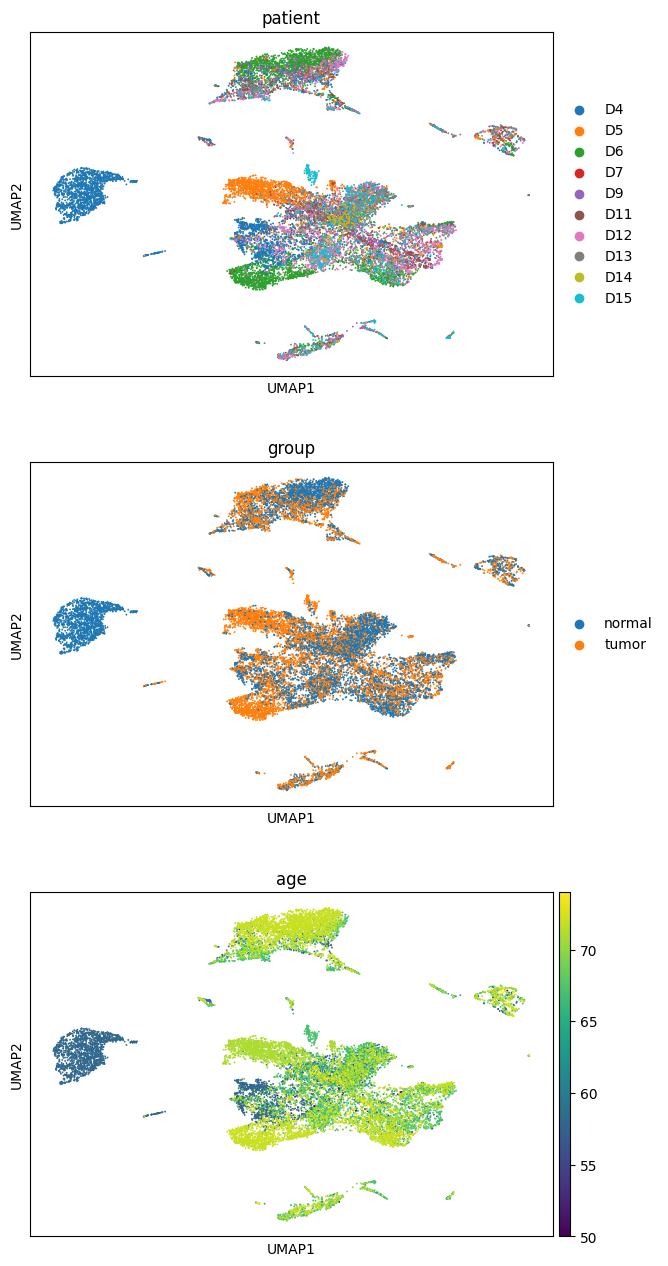

In [27]:
sc.pl.umap(
    adata,
    color=[
        "patient",
        "group",
        "age",
    ],
    ncols=1,
)

### Step 4 and 5 again: Batch correction!

Harmony is a popular batch correction tool that iteratively learns a cell-specific linear correction function at the level of PCA space. It is a very powerful tool for batch correction in single-cell analysis.

It can project ells into a shared embedding in which cells group by cell type rather than dataset-specific conditions, simultaneously accounts for multiple experimental and biological factors.

In [32]:
sc.external.pp.harmony_integrate(adata, key="barcode")

2024-07-01 13:23:19,702 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-07-01 13:23:25,078 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-01 13:23:25,190 - harmonypy - INFO - Iteration 1 of 10
2024-07-01 13:23:30,816 - harmonypy - INFO - Iteration 2 of 10
2024-07-01 13:23:36,011 - harmonypy - INFO - Converged after 2 iterations


In [33]:
adata

AnnData object with n_obs × n_vars = 17108 × 2526
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'name_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'patient_colors', 'group_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'co

In [35]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_pca_harmony")

In [36]:
sc.tl.umap(adata, min_dist=0.3)  # 0.3 is personal preference

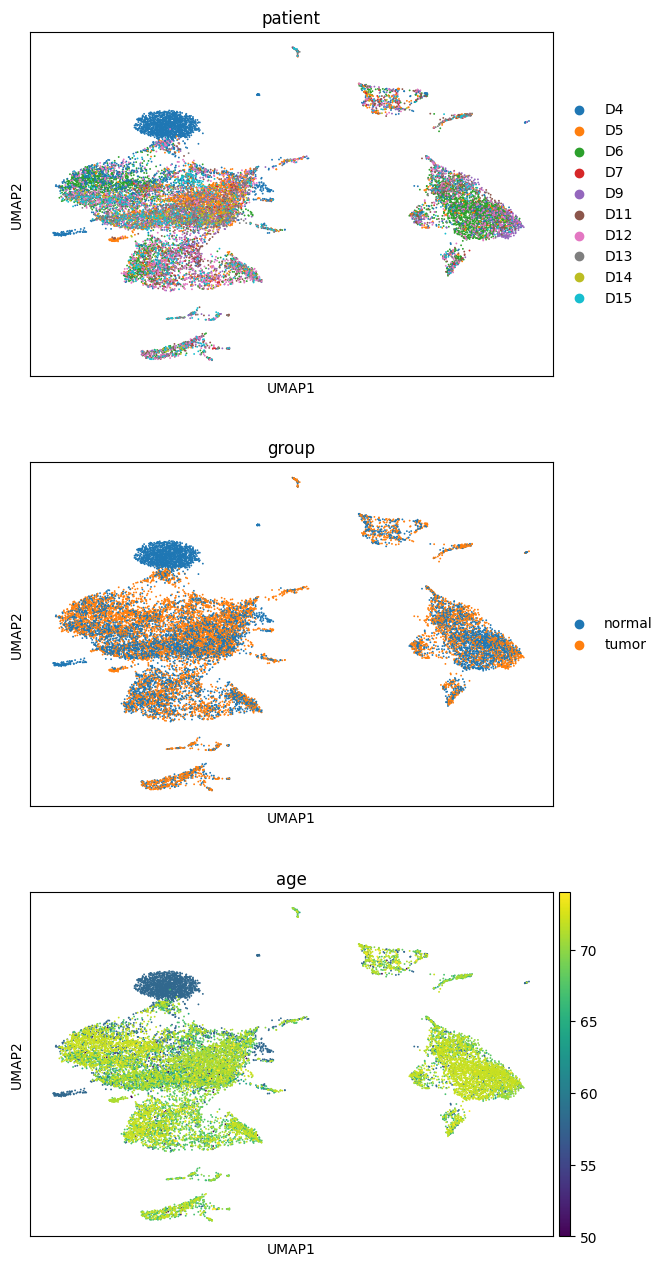

In [37]:
sc.pl.umap(
    adata,
    color=[
        "patient",
        "group",
        "age",
    ],
    ncols=1,
)

### Step 6: Clustering

We will use the `leiden` algorithm to cluster the cells into different groups. It is a graph-based clustering algorithm that is very popular in single-cell analysis. It is based on optimizing a modularity function that is used to detect communities in networks. It has a resolution parameter that can be tuned to get different levels of granularity in the clustering.

In [38]:
sc.tl.leiden(adata, resolution=0.5)

/var/folders/_r/j_8_fj3x28n2th3ch0ckn9c40000gt/T/ipykernel_92177/1771924308.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


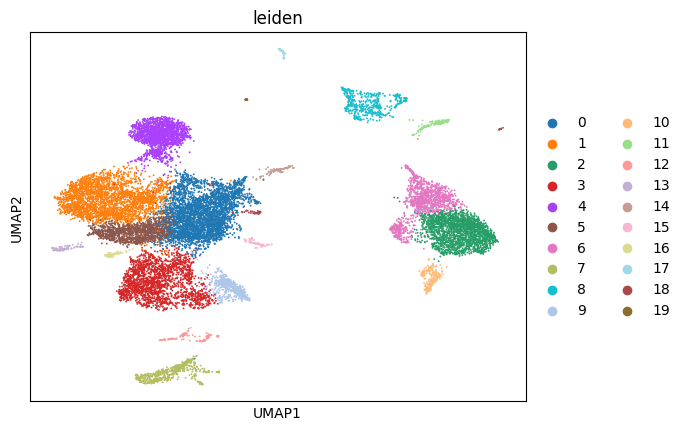

In [39]:
sc.pl.umap(adata, color="leiden")

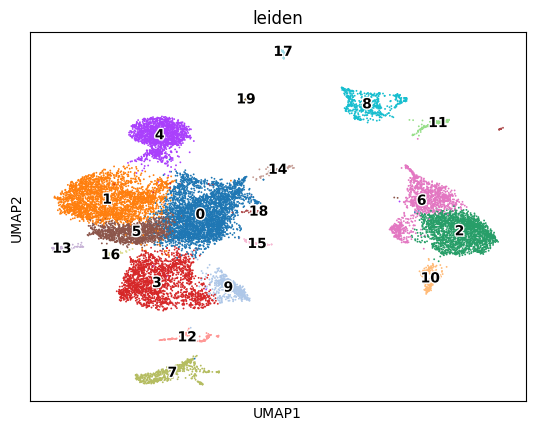

In [40]:
sc.pl.umap(adata, color="leiden", legend_loc="on data", legend_fontoutline=2)

### Step 7: Cell type annotation

From here on, the analysis will be more focused on the biological interpretation of the clusters. We will use marker genes to annotate the clusters with cell types.

The way to approach this can vary and I will first show using a statistical test to identify marker genes for each cluster. We will use the `rank_genes_groups` function from `scanpy` to identify marker genes for each cluster.

### 7.1: Rank genes per cluster using Wilcoxon rank-sum test

In [41]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")

Let's visualise the top statistically significant marker genes for each cluster.

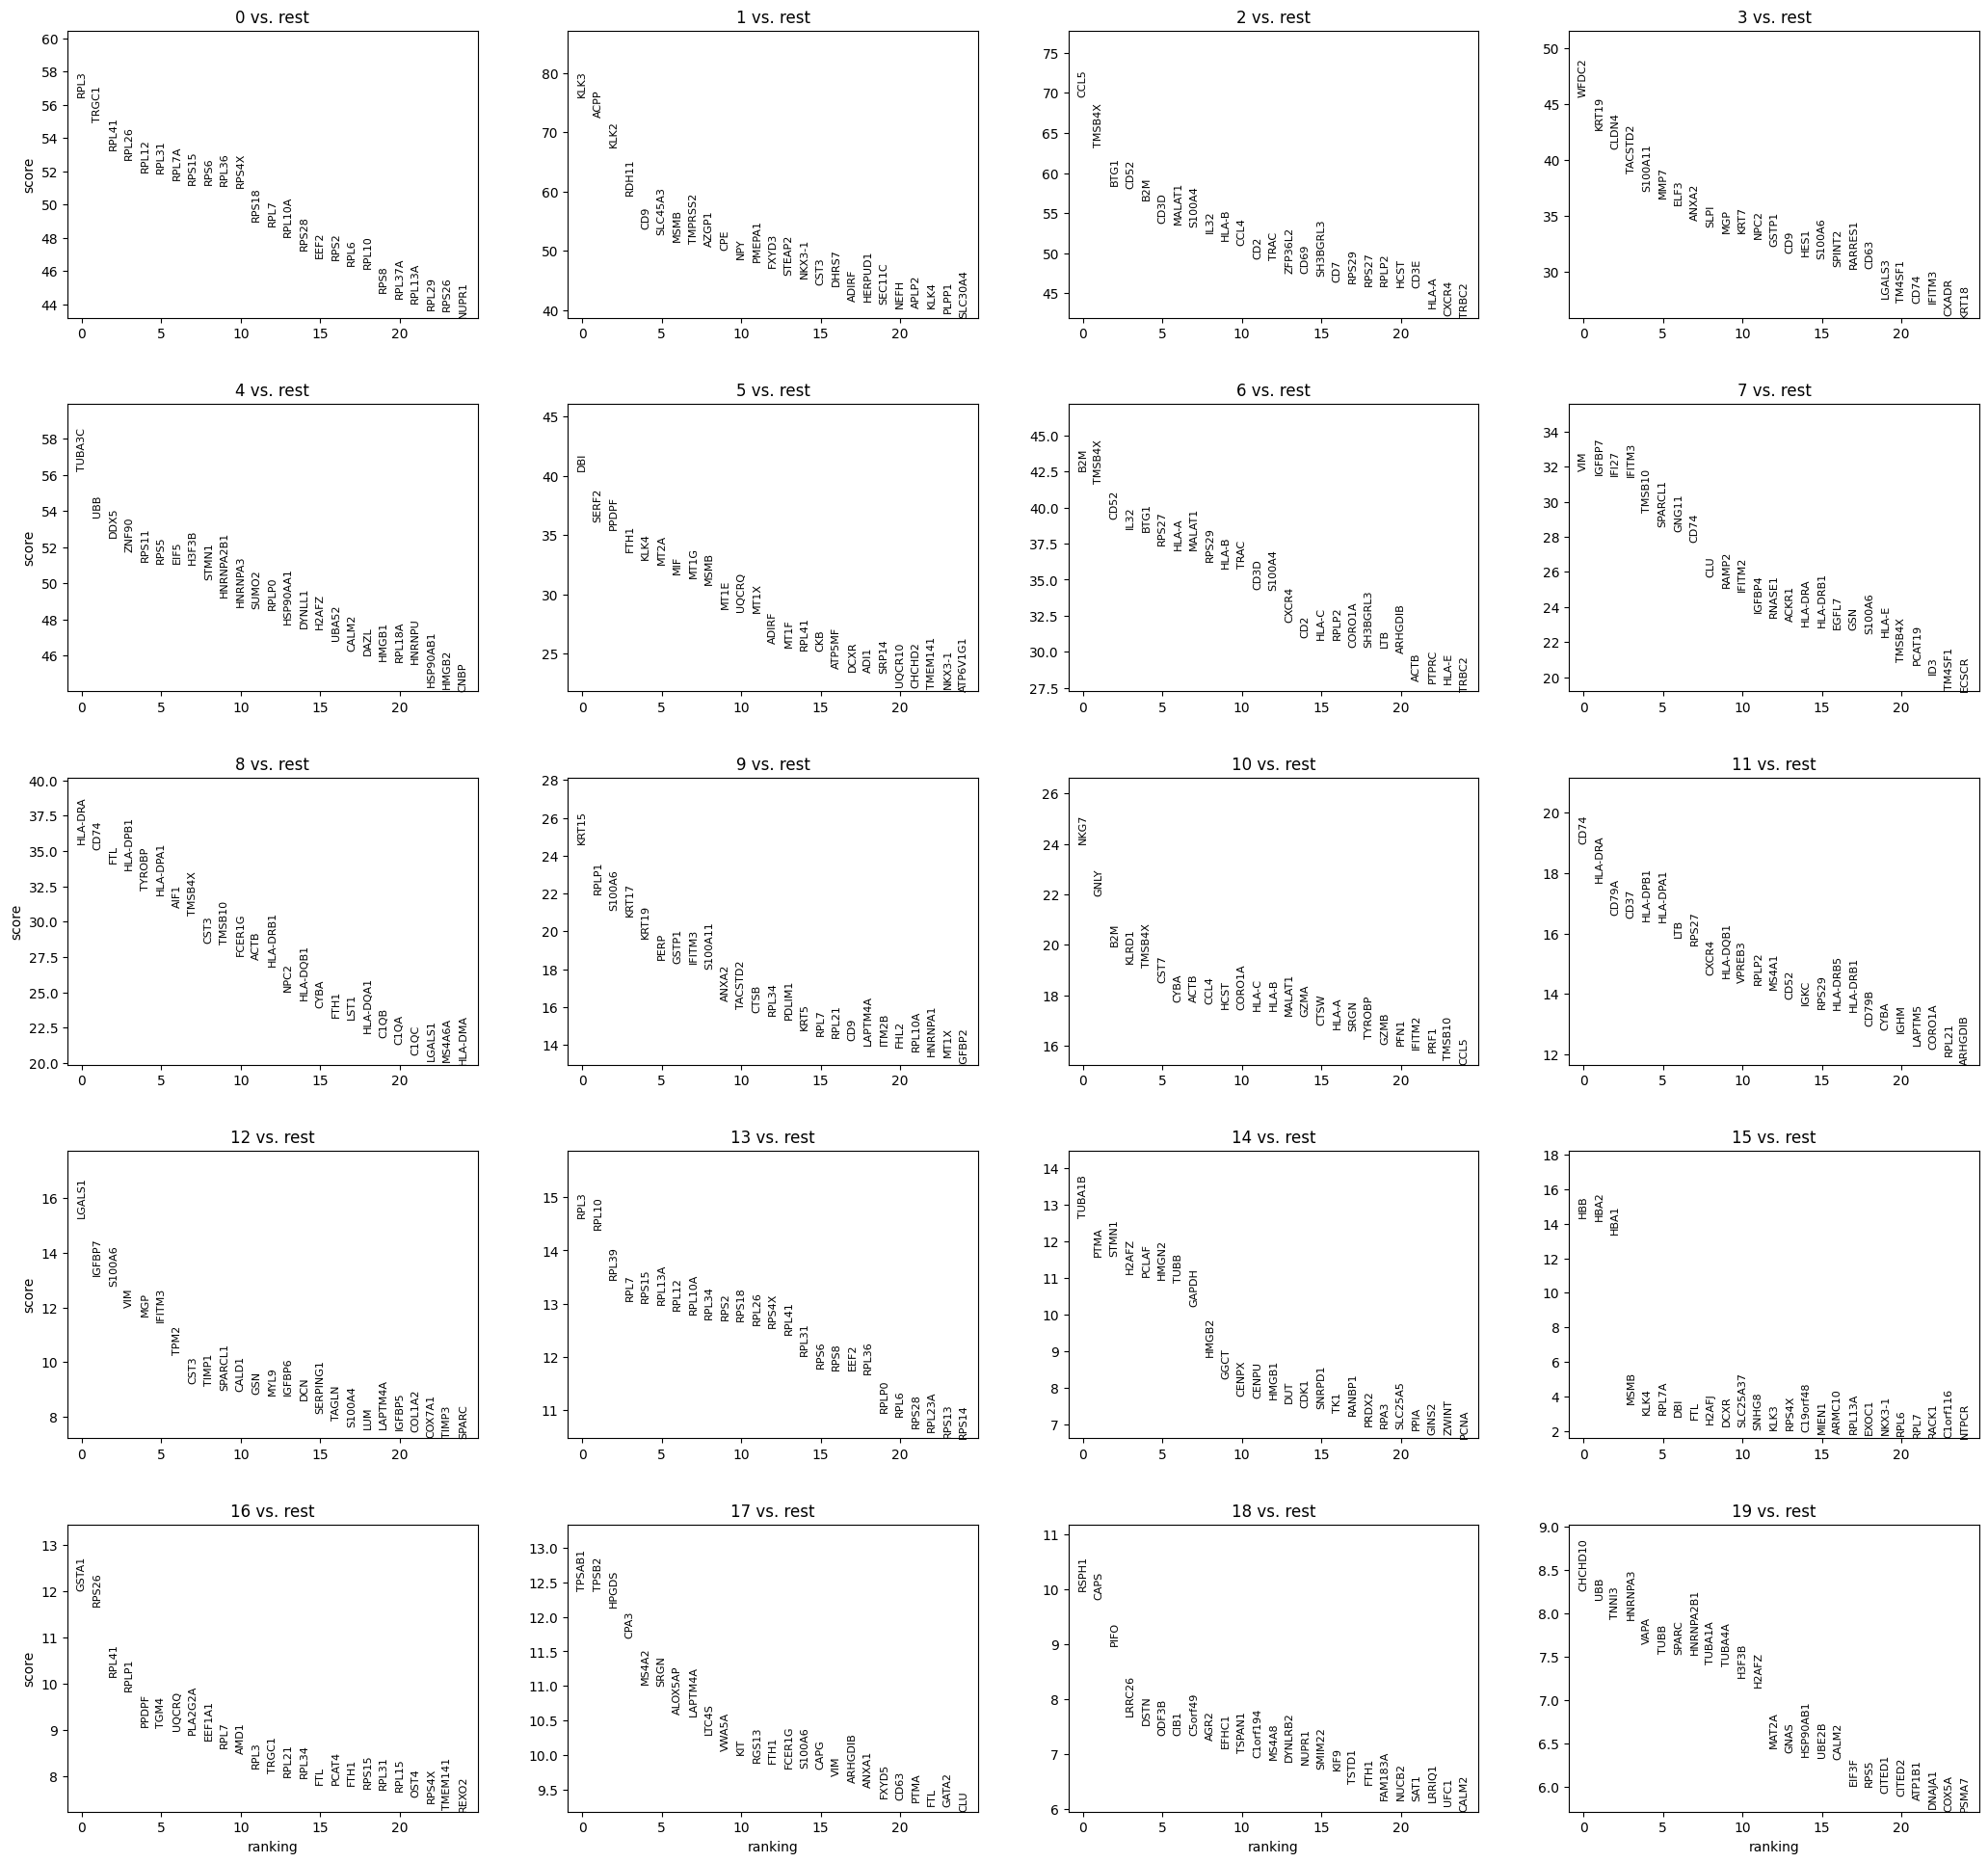

In [42]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

We can also visualise this as a dot plot.

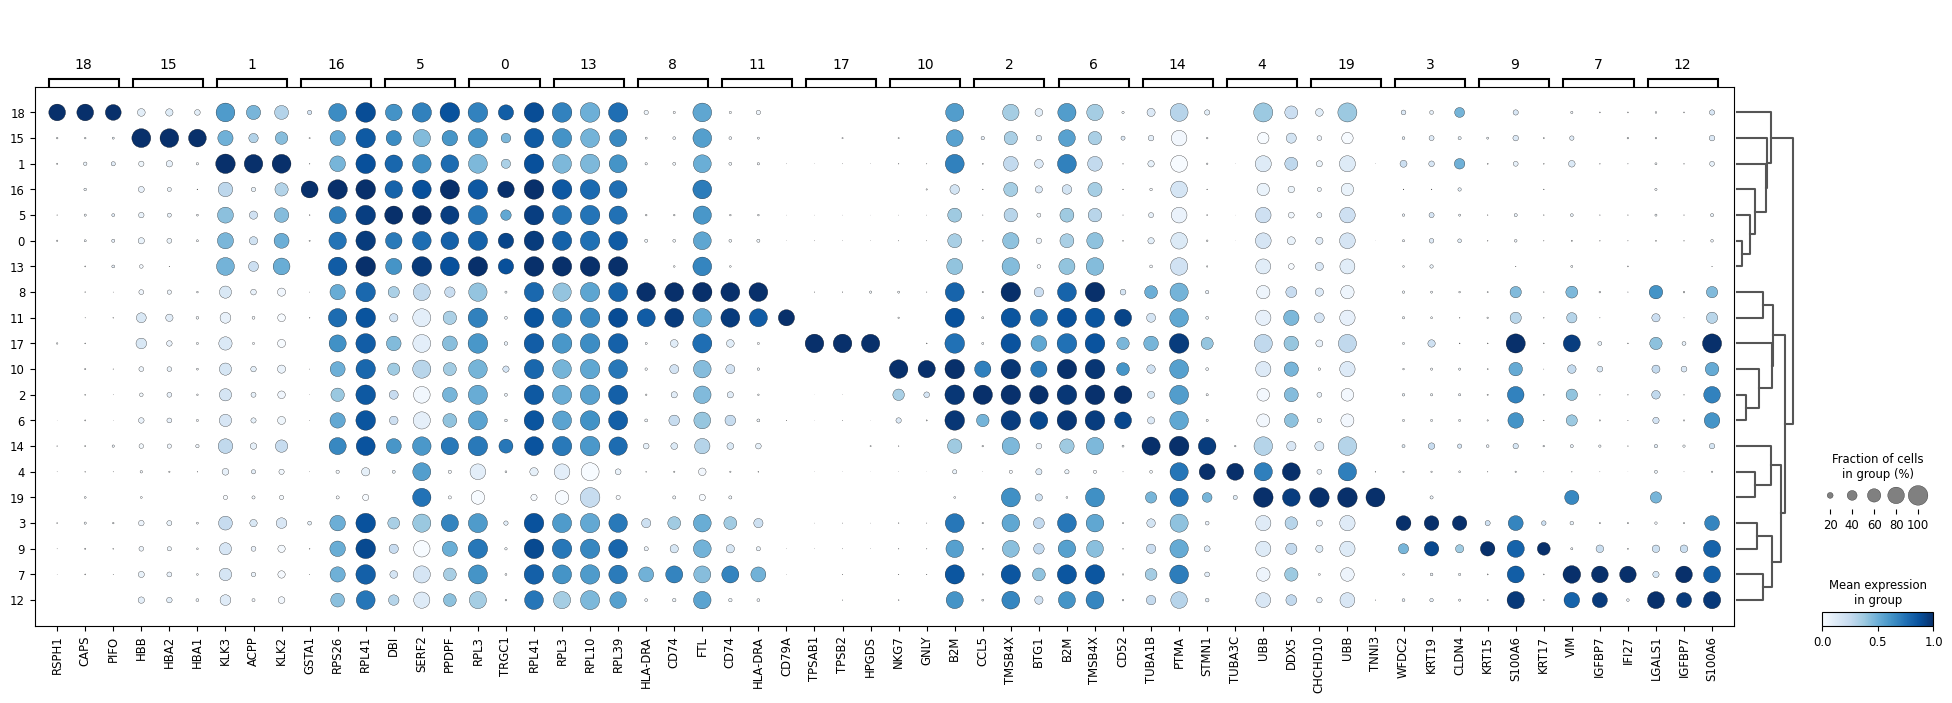

In [45]:
sc.pl.rank_genes_groups_dotplot(
    adata, n_genes=3, color_map="Blues", standard_scale="var", min_logfoldchange=1
)

### 7.2: Manually select marker genes

Ask yourself, what are relevant genes for each cluster? What are the marker genes that you would expect to see?

In [51]:
marker_genes = {
    "LE": ["KLK3", "KLK4"],
}

In [ ]:
sc.pl.dotplot(
    adata, marker_genes, groupby="leiden", standard_scale="var", color_map="Blues"
)

KeyError: ''

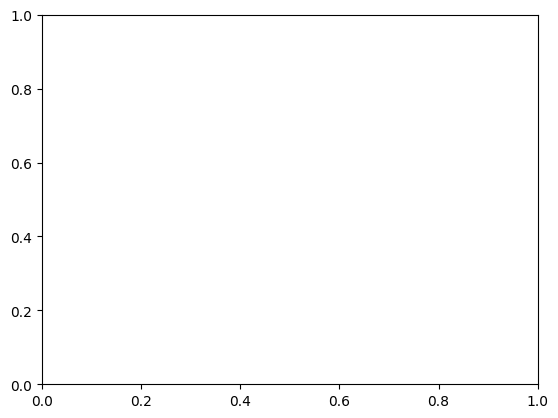

In [50]:
sc.pl.umap(adata, color="")

### Transfer the annotations

In [ ]:
cell_types = {
    "0": "",
    "1": "",
    "2": "",
    "3": "",
    "4": "",
    "5": "",
    "6": "",
    "7": "",
    "8": "",
    "9": "",
    "10": "",
    "11": "",
    "12": "",
    "13": "",
    "14": "",
    "15": "",
    "16": "",
    "17": "",
    "18": "",
    "19": "",
}

adata.obs["cell_type"] = [cell_types[x] for x in adata.obs["leiden"]]

In [ ]:
sc.pl.umap(adata, color="cell_type", legend_loc="on data", legend_fontoutline=2)

### 7.3: CellTypist

CellTypist is a tool that uses a machine learning model to predict cell types based on marker genes. It is a very powerful tool that can be used to predict cell types in single-cell data.

First, write out the raw data for input for celltypist

In [ ]:
adata.raw.to_adata().write_h5ad("for_celltypist.h5ad", compression="gzip")

Make a directory for the output after running celltypist on our data

In [ ]:
!mkdir celltypist_output

Run celltypist on our data and allow it to predict labels on each single cell with all the specifications needed.

In [ ]:
!celltypist --indata for_celltypist.h5ad --model Immune_All_Low.pkl --outdir celltypist_output --majority-voting

Import and label the object for `predicted_labels.csv` as `celltypist_result`.

In [ ]:
celltypist_result = pd.read_csv("celltypist_output/predicted_labels.csv", index_col=0)
celltypist_result

Transfer the celltypist results to the main data object.

In [ ]:
adata.obs["celltypist_majority_voting"] = pd.Series(
    celltypist_result["majority_voting"]
)
adata.obs

Visualise the data via umap with the new celltypist labels

In [ ]:
sc.pl.umap(adata, color=["celltypist_majority_voting"])
sc.pl.umap(
    adata,
    color=["celltypist_majority_voting"],
    legend_loc="on data",
    legend_fontoutline=2,
)

### Let's save this result

In [ ]:
adata.write_h5ad("data/prostate_demo_processed.h5ad", compression="gzip")

### Let's five a bit deeper into the T cells.

In [ ]:
# adata = sc.read_h5ad("prostate_demo_processed.h5ad")
adata_T = adata[adata.obs["cell_type"] == "T"]
adata_T

Let's re-cluster the T cells and visualise the data. We need to start from the step where most of the gene expression data has been normalised but not filtered yet i.e. is still intact, as we need to calculate the highly variable genes again. This time, the highly variable genes will be specific for the T cell sub-clusters. Lucky for us, we actually did store this step in the `.raw` slot.

### Continue the rest of the steps as before.

In [ ]:
adata_T = adata_T.raw.to_adata()
adata_T

In [ ]:
sc.pp.highly_variable_genes(adata_T, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_T)

In [ ]:
adata_T.var.highly_variable.value_counts()

highly_variable
False    18154
True      2526
Name: count, dtype: int64

In [ ]:
# stash what we have done in raw, before we subset the data
adata_T.raw = adata_T
# Actually do the filtering for PCA
adata_T = adata_T[
    :, adata_T.var.highly_variable
].copy()  # all rows/indexes : columns only selecting for those within high_variable, and then making a copy of itself
adata_T

In [ ]:
sc.pp.regress_out(adata_T, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata_T, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [ ]:
sc.external.pp.harmony_integrate(adata, key="barcode")
sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_pca_harmony")
sc.tl.umap(adata, min_dist=0.3)  # 0.3 is personal preference

2024-07-01 13:23:19,702 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-07-01 13:23:25,078 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-01 13:23:25,190 - harmonypy - INFO - Iteration 1 of 10
2024-07-01 13:23:30,816 - harmonypy - INFO - Iteration 2 of 10
2024-07-01 13:23:36,011 - harmonypy - INFO - Converged after 2 iterations


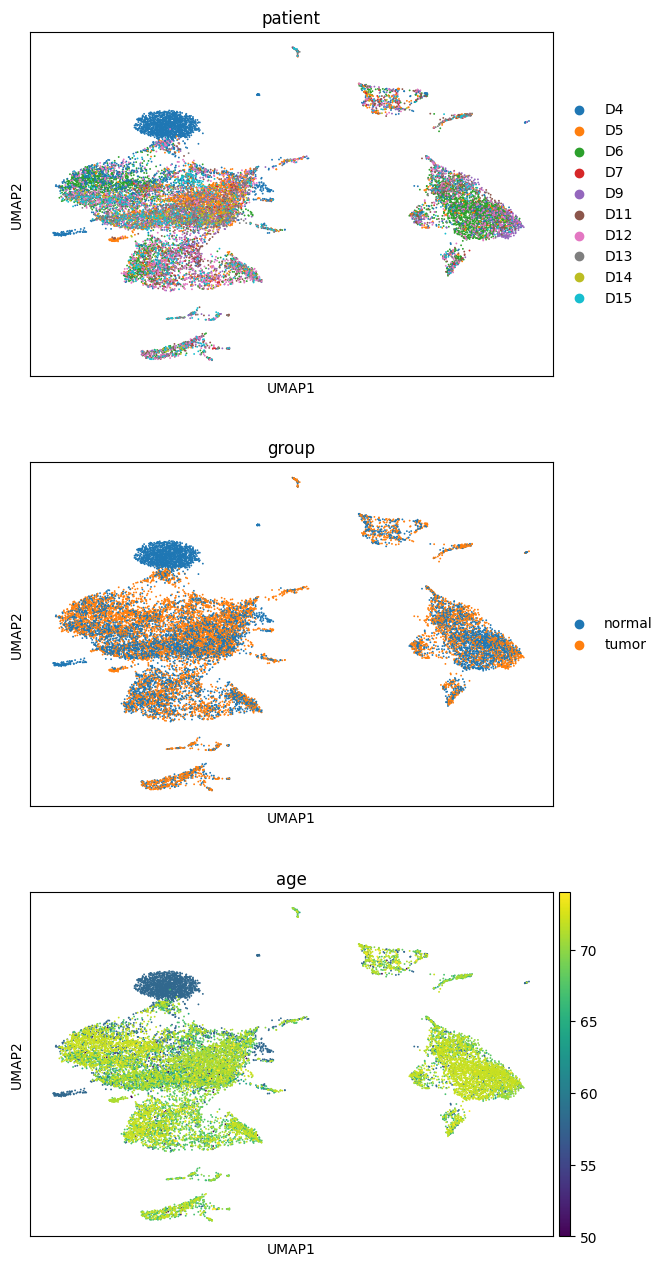

In [ ]:
sc.pl.umap(
    adata,
    color=[
        "patient",
        "group",
        "cell_type",
    ],
    ncols=1,
)

In [ ]:
sc.tl.leiden(adata, resolution=0.5)

/var/folders/_r/j_8_fj3x28n2th3ch0ckn9c40000gt/T/ipykernel_92177/1771924308.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


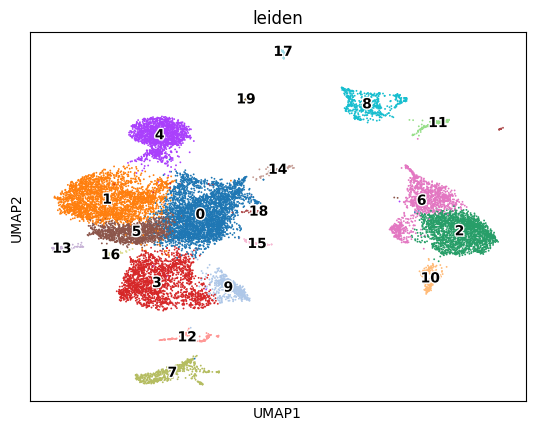

In [ ]:
sc.pl.umap(adata, color="leiden")
sc.pl.umap(adata, color="leiden", legend_loc="on data", legend_fontoutline=2)

### How would you visualise different T cell marker genes? ❓

Earlier, we saw genes CD4, CD8B. What are other cell surface markers found on T cells?

Some hints from https://www.nature.com/articles/s41467-019-12464-3

In [ ]:
marker_genes = (
    [
        "CD4",
        "CD8B",
        "FOXP3",
        "SELL",
        "CCR7",
        "MKI67",
        "NKG7",
        "GATA3",
        "RORC",
        "CXCR5",
        "CD69",
        "GZMK",
    ],
)
sc.pl.umap(
    adata,
    color=marker_genes,
    ncols=3,
    size=5,
    color_map=tools.cmp(),
)

In [ ]:
sc.pl.dotplot(
    adata_T, marker_genes, groupby="leiden", standard_scale="var", color_map="Blues"
)

KeyError: ''

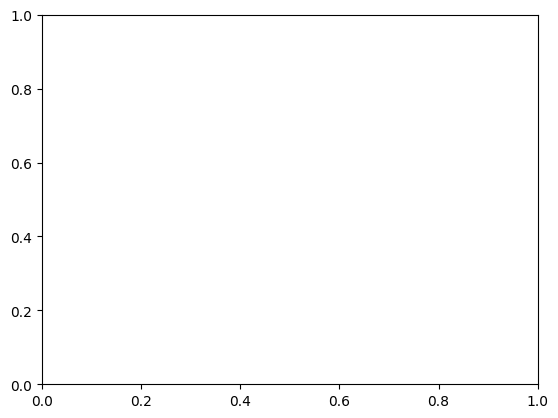

In [ ]:
sc.pl.umap(adata_T, color="")

### Transfer the annotations

In [ ]:
cell_types = {
    "0": "",
    "1": "",
    "2": "",
    "3": "",
    "4": "",
    "5": "",
    "6": "",
    "7": "",
    "8": "",
    "9": "",
    "10": "",
    "11": "",
    "12": "",
    "13": "",
    "14": "",
    "15": "",
    "16": "",
    "17": "",
    "18": "",
    "19": "",
}

adata_T.obs["cell_type_T"] = [cell_types[x] for x in adata_T.obs["leiden"]]

In [ ]:
sc.pl.umap(adata_T, color="cell_type_T", legend_loc="on data", legend_fontoutline=2)

In [ ]:
adata_T.write_h5ad("data/prostate_demo_processed_T.h5ad", compression="gzip")

This marks the end of the demo. Good job!